Chapter 10
# 等高线原理
Book_2《可视之美》 | 鸢尾花书：从加减乘除到机器学习  

In [1]:
# 导入包
import math
import numpy as np
import matplotlib.pyplot as plt
from sympy import lambdify, diff, exp, latex
from sympy.abc import x, y
# 从SymPy库中导入符号变量 x 和 y
from matplotlib import cm
# 导入色谱模块

import os

# 如果文件夹不存在，创建文件夹
if not os.path.isdir("Figures"):
    os.makedirs("Figures")

### 自定义函数

In [7]:
def mesh(num = 101):
    
    # number of mesh grids
    x_array = np.linspace(-3,3,num)
    y_array = np.linspace(-3,3,num)
    xx,yy = np.meshgrid(x_array,y_array)
    
    return xx, yy

### 定义曲面函数

In [8]:
# 用 sympy 库定义 MATLAB二元函数 peaks()
f_xy =  3*(1-x)**2*exp(-(x**2) - (y+1)**2)\
    - 10*(x/5 - x**3 - y**5)*exp(-x**2-y**2)\
    - 1/3*exp(-(x+1)**2 - y**2) 

f_xy_fcn = lambdify([x,y],f_xy)

# 生成数据
xx, yy = mesh(num = 121)
x_array = np.linspace(-3,3,101)
ff = f_xy_fcn(xx,yy)

# 将符号函数表达式转换为Python函数

# Reference: 
# https://www.mathworks.com/help/matlab/ref/peaks.html

In [5]:
f_xy

3*(1 - x)**2*exp(-x**2 - (y + 1)**2) - (-10*x**3 + 2*x - 10*y**5)*exp(-x**2 - y**2) - 0.333333333333333*exp(-y**2 - (x + 1)**2)

### 三维等高线

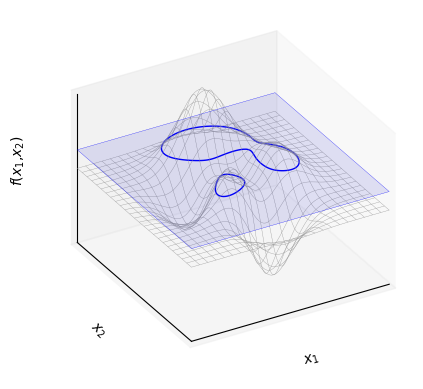

In [12]:

z_level = 2
xx_, yy_ = np.meshgrid(np.linspace(-3, 3, 2),np.linspace(-3, 3, 2))

fig, ax = plt.subplots(subplot_kw={'projection': '3d'})

zz_ = np.zeros_like(xx_) + z_level
ax.plot_surface(xx_, yy_, zz_, color = 'b', alpha = 0.1)
ax.plot_wireframe(xx_, yy_, zz_, color = 'b', 
                  lw = 0.2)

ax.plot_wireframe(xx,yy, ff,
                  color = [0.6, 0.6, 0.6],
                  rstride=5, cstride=5,
                  linewidth = 0.25)

ax.contour(xx,yy, ff,
           levels = [z_level],
           colors = 'b',
           linewidths = 1)

ax.set_proj_type('ortho')
# 另外一种设定正交投影的方式

ax.set_xlabel('$\it{x_1}$')
ax.set_ylabel('$\it{x_2}$')
ax.set_zlabel('$\it{f}$($\it{x_1}$,$\it{x_2}$)')

ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])

ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_zlim(-8, 8)
ax.view_init(azim=-120, elev=30)
ax.grid(False)
fig.savefig('Figures/等高线原理，空间一条等高线.svg', format='svg')

### 三维等高线到平面

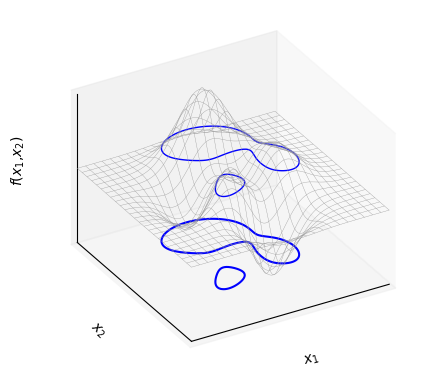

In [14]:
fig, ax = plt.subplots(subplot_kw={'projection': '3d'})

ax.plot_wireframe(xx,yy, ff,
                  color = [0.6, 0.6, 0.6],
                  rstride=5, cstride=5,
                  linewidth = 0.25)

ax.contour(xx, yy, ff,
           levels = [z_level],
           colors = 'b',
           linewidths = 1)

ax.contour(xx, yy, ff, 
           levels = [z_level],
           zdir='z', offset=-8, 
           colors = 'b')

ax.set_proj_type('ortho')
# 另外一种设定正交投影的方式

ax.set_xlabel('$\it{x_1}$')
ax.set_ylabel('$\it{x_2}$')
ax.set_zlabel('$\it{f}$($\it{x_1}$,$\it{x_2}$)')

ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])

ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_zlim(-8, 8)
ax.view_init(azim=-120, elev=30)
ax.grid(False)
fig.savefig('Figures/等高线原理，投影到平面.svg', format='svg')

### 一系列等高线

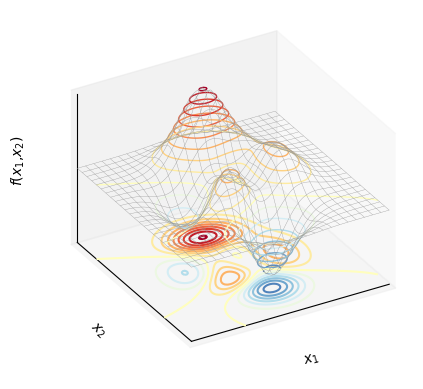

In [18]:
fig, ax = plt.subplots(subplot_kw={'projection': '3d'})


ax.plot_wireframe(xx,yy, ff,
                  color = [0.6, 0.6, 0.6],
                  rstride=5, cstride=5,
                  linewidth = 0.25)

CS = ax.contour(xx, yy, ff,
           levels = np.linspace(-8,8,17),
           cmap = 'RdYlBu_r',
           linewidths = 1)

# fig.colorbar(CS)
# 增加色谱条

ax.contour(xx, yy, ff, 
           levels = np.linspace(-8,8,17),
           zdir='z', offset=-8, 
           cmap = 'RdYlBu_r')

ax.set_proj_type('ortho')
# 另外一种设定正交投影的方式

ax.set_xlabel('$\it{x_1}$')
ax.set_ylabel('$\it{x_2}$')
ax.set_zlabel('$\it{f}$($\it{x_1}$,$\it{x_2}$)')

ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])

ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_zlim(-8, 8)
ax.view_init(azim=-120, elev=30)
ax.grid(False)
fig.savefig('Figures/等高线原理，一系列等高线.svg', format='svg')

### 平面等高线

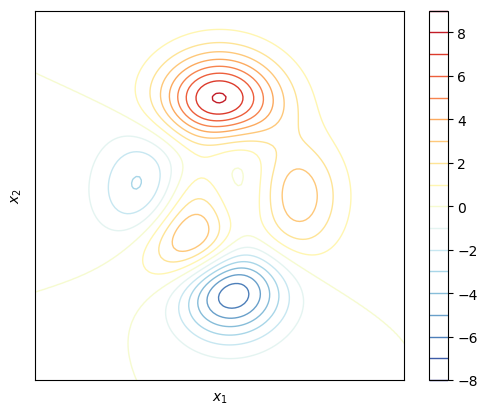

In [23]:
fig, ax = plt.subplots()

CS = ax.contour(xx, yy, ff,
           levels = np.linspace(-8,9,18),
           cmap = 'RdYlBu_r',
           linewidths = 1)
fig.colorbar(CS)

ax.set_xlabel('$\it{x_1}$')
ax.set_ylabel('$\it{x_2}$')

ax.set_xticks([])
ax.set_yticks([])

ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.grid(False)
ax.set_aspect('equal', adjustable='box')
fig.savefig('Figures/平面等高线.svg', format='svg')

### 打印等高线数值

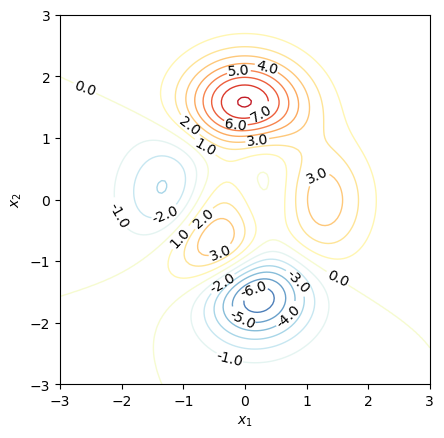

In [22]:
fig, ax = plt.subplots()

CS = ax.contour(xx, yy, ff,
           levels = np.linspace(-8,9,18),
           cmap = 'RdYlBu_r',
           linewidths = 1)

ax.clabel(CS, fmt = '%2.1f', colors = 'k', fontsize=10)

ax.set_xlabel('$\it{x_1}$')
ax.set_ylabel('$\it{x_2}$')
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.grid(False)
ax.set_aspect('equal', adjustable='box')
fig.savefig('Figures/打印等高线数值.svg', format='svg')

### 单色等高线

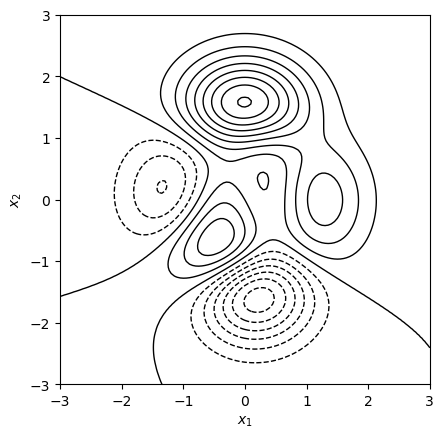

In [24]:
fig, ax = plt.subplots()

ax.contour(xx, yy, ff,
           levels = np.linspace(-8,9,18),
           colors = 'k',
           linewidths = 1)
# 负数用虚线，默认

ax.set_xlabel('$\it{x_1}$')
ax.set_ylabel('$\it{x_2}$')
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.grid(False)
ax.set_aspect('equal', adjustable='box')
fig.savefig('Figures/单色等高线.svg', format='svg')

### 填充等高线，空间

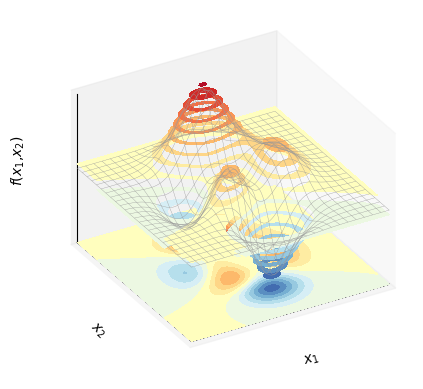

In [27]:
fig, ax = plt.subplots(subplot_kw={'projection': '3d'})


ax.plot_wireframe(xx,yy, ff,
                  color = [0.6, 0.6, 0.6],
                  rstride=5, cstride=5,
                  linewidth = 0.25)

CS = ax.contourf(xx, yy, ff,
           levels = np.linspace(-8,9,18),
           cmap = 'RdYlBu_r')

# fig.colorbar(CS)
ax.contourf(xx, yy, ff, 
           levels = np.linspace(-8,9,18),
           zdir='z', offset=-8, 
           cmap = 'RdYlBu_r')

ax.set_proj_type('ortho')
# 另外一种设定正交投影的方式

ax.set_xlabel('$\it{x_1}$')
ax.set_ylabel('$\it{x_2}$')
ax.set_zlabel('$\it{f}$($\it{x_1}$,$\it{x_2}$)')

ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])

ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_zlim(-8, 8)
ax.view_init(azim=-120, elev=30)
ax.grid(False)
fig.savefig('Figures/填充等高线原理.svg', format='svg')

### 填充等高线，平面

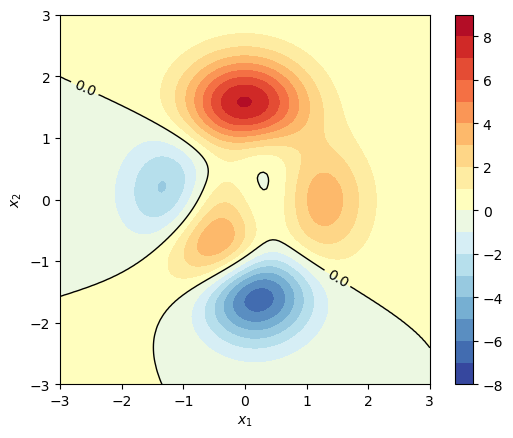

In [29]:
fig, ax = plt.subplots()

CS_filled = ax.contourf(xx, yy, ff,
           levels = np.linspace(-8,9,18),
           cmap = 'RdYlBu_r')

fig.colorbar(CS_filled)

CS = ax.contour(xx, yy, ff,
           levels = [0],
           colors = 'k',
           linewidths = 1)
ax.clabel(CS, fmt = '%2.1f', colors = 'k', fontsize=10)

ax.set_xlabel('$\it{x_1}$')
ax.set_ylabel('$\it{x_2}$')
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.grid(False)
ax.set_aspect('equal', adjustable='box')
fig.savefig('Figures/填充等高线，平面.svg', format='svg')


In [ ]:
# Repo: https://github.com/Visualize-ML
# Book 2 Beauty of Visualization  |  From Basic Arithmetic to Machine Learning
# Published and copyrighted by Tsinghua University Press
# Beijing, China, 2023